In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
shapes = cv.imread("images/contourss.png")
shapes.shape

(1080, 1920, 3)

In [4]:
print("Total no. of pixels = {}".format(1080*1920*3))

Total no. of pixels = 6220800


(-0.5, 1919.5, 1079.5, -0.5)

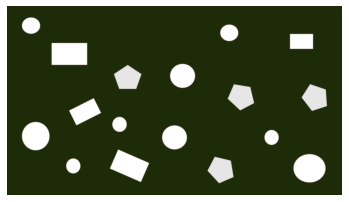

In [5]:
plt.imshow(shapes) # cmap
plt.axis("off")

(-0.5, 1919.5, 1079.5, -0.5)

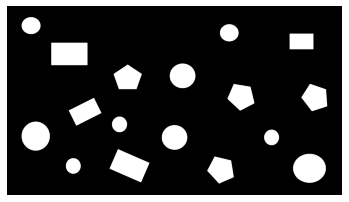

In [6]:
gray_shapes = cv.cvtColor(shapes, cv.COLOR_BGR2GRAY)
_,thresh1 = cv.threshold(gray_shapes, 50, 255, cv.THRESH_BINARY)

plt.imshow(thresh1, cmap="Greys_r")
plt.axis("off")

In [7]:
contours, hierarchy	=	cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# contours[0]

(-0.5, 1919.5, 1079.5, -0.5)

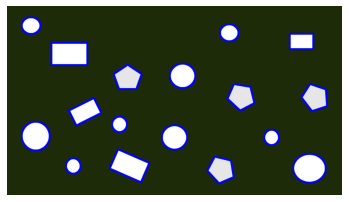

In [8]:
contours, hierarchy	= cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_with_contours = cv.drawContours(shapes, contours, -1, (0, 0, 255), 10) 

# (-1) indicates all contour indexes
# (3) thickness of contour line
# 

plt.imshow(img_with_contours)
plt.axis("off")


In [9]:
# M = cv.moments(contours[0])
# M

In [10]:
# print(hierarchy)

x = ["a", "b"]
y = [1, 2]

for i, j in zip(x, y):
    print(f"{i}-{j}")

a-1
b-2


In [11]:
hierarchy.shape

(1, 17, 4)

In [12]:
hierarchy[:, 16, :]
# hierarchy[0].shape

array([[-1, 15, -1, -1]], dtype=int32)

In [13]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [-1, 15, -1, -1]]], dtype=int32)

In [14]:
# Filter internal contours, get information about children

filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

print(has_a_child)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
# Get all useful information from contours
features_list = []

for contour, childs in zip(filtered_contours, has_a_child):
  moments = cv.moments(contour) # Central moments from OpenCV: eg. area, centroid
  hu_moments = cv.HuMoments(moments) # Hu moments computed from Central Moments: 7 features
  
  contour_area = cv.contourArea(contour)
  arc_length = cv.arcLength(contour, True)
  if arc_length > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = (4 * 3.14 * contour_area) / arc_length**2
    features['has_child'] = childs
    features_list.append(features)

In [16]:
features_list[0]

{0: 0.1593469079107245,
 1: 5.597966325607013e-05,
 2: 7.0348665444939776e-09,
 3: 3.4160820763310933e-12,
 4: -1.5338306145110837e-22,
 5: -5.476562312747097e-15,
 6: -5.068669940101708e-22,
 'circularity': 0.8975184298091826,
 'has_child': 0}

In [17]:
# Save data as pd.DataFrame
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(features_list)
df

,0,1,2,3,4,5,6,circularity,has_child
0,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.90,0
1,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.77,0
2,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.89,0
3,0.19,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.64,0
4,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.90,0
5,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.90,0
6,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.90,0
7,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.89,0
8,0.19,0.01,0.00,0.00,-0.00,-0.00,0.00,0.63,0
9,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.77,0


In [18]:
# Cluster with KMeans
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values # returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=6, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv.drawContours(shapes, [contour], 0, colors[label], 13)
  
print(df)
# cv2_imshow(classified)


[0 2 0 3 0 0 0 0 5 2 2 2 0 1 4 0 0]
      0    1    2    3     4     5     6    7    8
0  0.17 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
1  0.21 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
2  0.18 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
3  0.28 0.01 0.00 0.00 -0.00 -0.00 -0.00 0.96 0.00
4  0.17 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
5  0.17 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
6  0.17 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
7  0.18 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
8  0.29 0.01 0.00 0.00 -0.00 -0.00  0.00 0.96 0.00
9  0.21 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
10 0.21 0.00 0.00 0.00  0.00  0.00 -0.00 0.98 0.00
11 0.21 0.00 0.00 0.00 -0.00 -0.00  0.00 0.98 0.00
12 0.17 0.00 0.00 0.00  0.00  0.00  0.00 0.98 0.00
13 0.24 0.01 0.00 0.00  0.00  0.00 -0.00 0.97 0.00
14 0.23 0.01 0.00 0.00  0.00 -0.00  0.00 0.97 0.00
15 0.18 0.00 0.00 0.00 -0.00 -0.00 -0.00 0.98 0.00
16 0.18 0.00 0.00 0.00  0.00  0.00  0.00 0.98 0.00


(-0.5, 1919.5, 1079.5, -0.5)

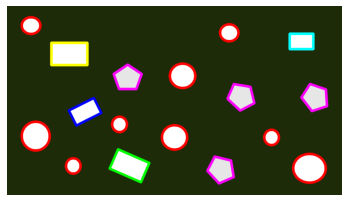

In [19]:
plt.imshow(classified)
plt.axis("off")